**K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this ascademic work"**

# 1. Three Guiding Exploration Questions

a. First Question: What is the most mentioned food in the review?
    
b. Second Question: Is there more positive or negative reviews?
    
c. Third Question: How is the service quality?

In [29]:
#import library
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [30]:
#load data
file_to_read = "reviews.txt"
text = open(file_to_read, "r").read().splitlines()

In [31]:
#Text Preprocessing
tokens = str(text)
#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'great': 134, 'service': 102, 'good': 73, 'amazing': 52, 'delicious': 48, 'time': 46, 'italian': 44, 'portion': 41, 'manhattan': 38, 'place': 38, ...})

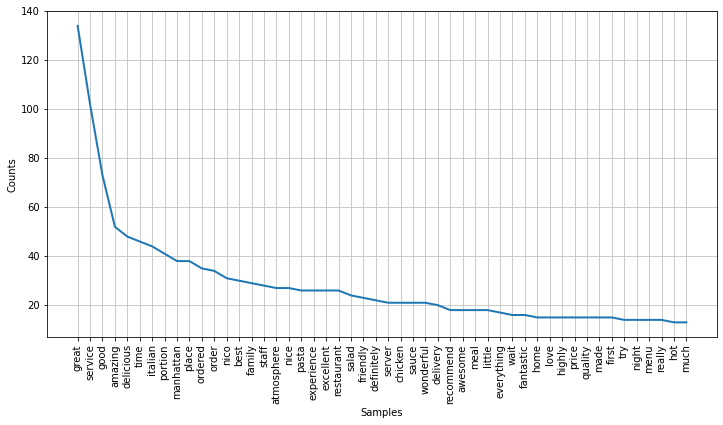

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
#Word Frequency Analysis
plt.figure(figsize=(12,6))
fdist.plot(50)

# 2. Popular Words from dataset

In [33]:
#load data
file_to_read = "reviews.txt"
text = open(file_to_read, "r").read().splitlines()
tokens = str(text)
#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
fdist = nltk.FreqDist(tokens)
fdist.most_common(50)

[('great', 134),
 ('service', 102),
 ('good', 73),
 ('amazing', 52),
 ('delicious', 48),
 ('time', 46),
 ('italian', 44),
 ('portion', 41),
 ('manhattan', 38),
 ('place', 38),
 ('ordered', 35),
 ('order', 34),
 ('nico', 31),
 ('best', 30),
 ('family', 29),
 ('staff', 28),
 ('atmosphere', 27),
 ('nice', 27),
 ('pasta', 26),
 ('experience', 26),
 ('excellent', 26),
 ('restaurant', 26),
 ('salad', 24),
 ('friendly', 23),
 ('definitely', 22),
 ('server', 21),
 ('chicken', 21),
 ('sauce', 21),
 ('wonderful', 21),
 ('delivery', 20),
 ('recommend', 18),
 ('awesome', 18),
 ('meal', 18),
 ('little', 18),
 ('everything', 17),
 ('wait', 16),
 ('fantastic', 16),
 ('home', 15),
 ('love', 15),
 ('highly', 15),
 ('price', 15),
 ('quality', 15),
 ('made', 15),
 ('first', 15),
 ('try', 14),
 ('night', 14),
 ('menu', 14),
 ('really', 14),
 ('hot', 13),
 ('much', 13)]

# 3. Popular bi-grams

In [34]:
#load data
file_to_read = "reviews.txt"
text = open(file_to_read, "r").read().splitlines()
tokens = str(text)
#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(25)

[(('great', 'service'), 24),
 (('service', 'great'), 19),
 (('highly', 'recommend'), 13),
 (('italian', 'restaurant'), 13),
 (('good', 'service'), 13),
 (('great', 'great'), 10),
 (('family', 'style'), 9),
 (('first', 'time'), 9),
 (('little', 'italy'), 8),
 (('portion', 'generous'), 7),
 (('great', 'italian'), 7),
 (('best', 'italian'), 7),
 (('service', 'good'), 7),
 (('service', 'amazing'), 6),
 (('great', 'atmosphere'), 6),
 (('chopped', 'salad'), 6),
 (('nico', 'little'), 6),
 (('excellent', 'service'), 5),
 (('restaurant', 'manhattan'), 5),
 (('good', 'good'), 5),
 (('top', 'notch'), 5),
 (('wonderful', 'service'), 5),
 (('even', 'better'), 5),
 (('next', 'time'), 5),
 (('really', 'good'), 5)]

# 4. A word cloud for your data. The size of word cloud should be large enough for comparison (figsize=(16,16) or more). Make sure to remove stopwords.

(-0.5, 399.5, 199.5, -0.5)

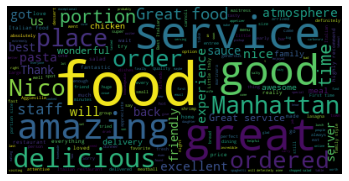

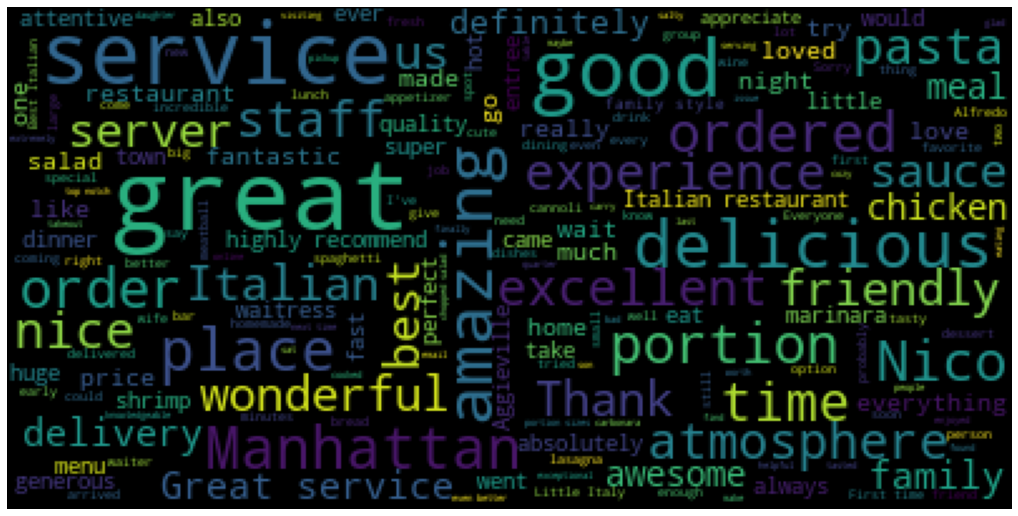

In [35]:
text = open(file_to_read, "r").read()
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(text)
plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis("off")

# 5. The Findings to Answer your 3 Questions

In [36]:
# First Question: What is the most mentioned food in the review?
file_to_read = "reviews.txt"
text = open(file_to_read, "r").read().splitlines()
tokens = str(text)

food = wordnet.synset('food.n.02')
list_of_food = set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()])

#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back', 'date', 'takeout'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
tokens = (word for word in tokens if word in list_of_food)

fdist = nltk.FreqDist(tokens)
fdist
# Filter non-alphanumeric characters from tokens
#tokens = (word for word in tokens if word.isalpha())
#remove short words
#tokens = (word for word in tokens if len(word) >= 3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('lunch_meat.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('headcheese.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('haslet.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('leg_of_lamb.n.01') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):

FreqDist({'pasta': 26, 'chicken': 21, 'shrimp': 9, 'bread': 8, 'lasagna': 8, 'spaghetti': 6, 'ravioli': 4, 'tortellini': 4, 'meat': 4, 'scallop': 4, ...})

In [37]:
# Second Question: Is there more positive or negative reviews?
file_to_read = "reviews.txt"
positive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
negative_words = open('Bing_liu_negative.txt', "r").read().splitlines()
text_file = open(file_to_read, "r").read().splitlines()

positive_review = []
negative_review = []
neutral_review = []

# Example 1c: Remove useless numbers and alphanumerical words (good for some sentiment analysis techniques)
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in text_file]
texts = [[word for word in document.lower().split() ] for document in documents]

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
            positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)
print(len(positive_review), ' positive reviews')
print(len(negative_review), ' negative reviews')
print(len(neutral_review), ' neutral reviews')

286  positive reviews
8  negative reviews
20  neutral reviews


In [38]:
#Third Question: How is the service quality?
#load data
file_to_read = "reviews.txt"
text = open(file_to_read, "r").read().splitlines()
tokens = str(text)
#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(25)

[(('great', 'service'), 24),
 (('service', 'great'), 19),
 (('highly', 'recommend'), 13),
 (('italian', 'restaurant'), 13),
 (('good', 'service'), 13),
 (('great', 'great'), 10),
 (('family', 'style'), 9),
 (('first', 'time'), 9),
 (('little', 'italy'), 8),
 (('portion', 'generous'), 7),
 (('great', 'italian'), 7),
 (('best', 'italian'), 7),
 (('service', 'good'), 7),
 (('service', 'amazing'), 6),
 (('great', 'atmosphere'), 6),
 (('chopped', 'salad'), 6),
 (('nico', 'little'), 6),
 (('excellent', 'service'), 5),
 (('restaurant', 'manhattan'), 5),
 (('good', 'good'), 5),
 (('top', 'notch'), 5),
 (('wonderful', 'service'), 5),
 (('even', 'better'), 5),
 (('next', 'time'), 5),
 (('really', 'good'), 5)]

# 6. Explain the following concepts and methods (Put answers into your own words)

a. Text (pre)processing

In [39]:
tokens = str(text)
#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'great': 134, 'service': 102, 'good': 73, 'amazing': 52, 'delicious': 48, 'time': 46, 'italian': 44, 'portion': 41, 'manhattan': 38, 'place': 38, ...})

Text preproccesing cleans up the given text so that it can be used for sentimental analysis

b. Tokenization

In [40]:
tokens = str(text)
#lowercase
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)

Tokenization breaks up larger text into smaller pieces so it is easier for python to consume

c. Stopwords

In [41]:
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)

Stopwords are words that you want to get rid of from your tokenized text. They are used to make the datasets more clear

d. Lowercase

In [42]:
tokens = tokens.lower()

AttributeError: 'generator' object has no attribute 'lower'

.lower function is used to turn the given string into all lowercase letters

e. Short words

In [ ]:
tokens = (word for word in tokens if len(word) >= 3)

Short words are words that are less than 3 letters. They are not needed in the text, as they are too short to be real word

f. Stemming

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)

Stemming normalize words that have similar meanings

g. Lemmatizing

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)

Lemmatizing takes words that are used in same context and group them together